# **Imports**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
import lightgbm as lgb
import xgboost

from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import StackingClassifier


# **Functions**

In [51]:
def read_file(file_path):
    data = pd.read_csv(file_path, index_col=0)

    return data

In [52]:
def label_encoding(data, column, mapping):
    
    data[column] = data[column].map(mapping)

    return data[column]

# **Loading Data**

In [69]:
file_path = r"C:\Users\Space\Documents\py\Projects\TuringCollege\Stroke\Stroke_New\Data\stroke.csv"
data = read_file(file_path)
data = data.drop(columns=['ID'])

# **BMI Missing Values**

In [70]:
data['BMI'] = data['BMI'].fillna(0)
data['BMI Available'] = 0  
data.loc[data['BMI'] != 0, 'BMI Available'] = 1 

# **Encoding**

In [71]:
gender_mapping = {'Male': 1, 'Female': 2}
data ['Gender'] = label_encoding(data, 'Gender', gender_mapping)

In [72]:
marriage_mapping = {'Yes': 1, 'No': 2}
data ['Ever Married']= label_encoding(data, 'Ever Married', marriage_mapping)

In [73]:
work_mapping = {'Private': 1, 'Self-employed': 2, 'Govt_job': 3, 'Never_worked': 4, 'children': 5}
data['Work'] = label_encoding(data, 'Work', work_mapping)

In [74]:
residence_mapping = {'Urban': 1, 'Rural': 2}
data['Residence'] = label_encoding(data, 'Residence', residence_mapping)

In [75]:
smoking_mapping = {'never smoked': 1, 'smokes': 2, 'formerly smoked': 3, 'Unknown': 4}
data['Smoking'] = label_encoding(data, 'Smoking', smoking_mapping)

# **Grouping by Age**

In [ ]:
gender_stroke = data.groupby('Age')['Stroke'].sum()

In [61]:
data = data[data['Age'] > 57]

In [76]:
data.shape

(5109, 12)

# **Machine Learning**

## **Scaling**

In [77]:
target_column = 'Stroke'
random_seed = 42

In [78]:
X = data.drop(columns=[target_column])  
y = data[target_column]

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed, stratify=y)

In [81]:
columns_to_scale = ['Age', 'AVG Glucose', 'BMI']

scaler = RobustScaler()

X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[columns_to_scale] = scaler.fit_transform(X_train[columns_to_scale])
X_test_scaled[columns_to_scale] = scaler.transform(X_test[columns_to_scale])

## **Simple Models**

In [ ]:
log = LogisticRegression(random_state=random_seed)
log.fit(X_train_scaled, y_train)

y_predict = log.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_predict = knn.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
dt = DecisionTreeClassifier(random_state=random_seed)
dt.fit(X_train_scaled, y_train)

y_predict = dt.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

## **Ensemble Models**

In [ ]:
log_reg = LogisticRegression(random_state=random_seed)
decision_tree = DecisionTreeClassifier(random_state=random_seed)
svc = SVC(probability=True, random_state=random_seed) 


voting_clf = VotingClassifier(estimators=[('lr', log_reg), ('dt', decision_tree), ('svc', svc)], voting='soft')
voting_clf.fit(X_train_scaled, y_train)

y_predict = voting_clf.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
estimators = [
    ('lr', LogisticRegression(random_state=42)),
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('svc', SVC(probability=True, random_state=42))
]

stacking_clf = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())

y_predict = voting_clf.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME', random_state=random_seed)
ada.fit(X_train_scaled, y_train)

y_predict = ada.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=random_seed)
lgb_model.fit(X_train_scaled, y_train)

y_predict = lgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_scaled, y_train)

y_predict = xgb.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

## **Balanced Models**    

In [ ]:
log = LogisticRegression(class_weight='balanced', random_state=random_seed)
log.fit(X_train_scaled, y_train)

y_predict = log.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
dt = DecisionTreeClassifier(class_weight='balanced', random_state=random_seed)
dt.fit(X_train_scaled, y_train)

y_predict = dt.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
brf = BalancedRandomForestClassifier(class_weight='balanced', sampling_strategy='all', replacement = True, bootstrap = False, random_state=random_seed)
brf.fit(X_train, y_train)

y_predict = brf.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))


In [ ]:
eec = EasyEnsembleClassifier()
eec.fit(X_train, y_train)

y_predict = eec.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))


## **Ensemble Models**

In [ ]:
ada = AdaBoostClassifier(algorithm='SAMME', random_state=random_seed)
ada.fit(X_train_scaled, y_train)

y_predict = ada.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=random_seed)
lgb_model.fit(X_train_scaled, y_train)

y_predict = lgb_model.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

In [ ]:
xgb = xgboost.XGBClassifier()
xgb.fit(X_train_scaled, y_train)

y_predict = xgb.predict(X_test_scaled)

print(classification_report(y_test, y_predict, zero_division=0))

# **AUC**

              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022

AUC Score: 0.83


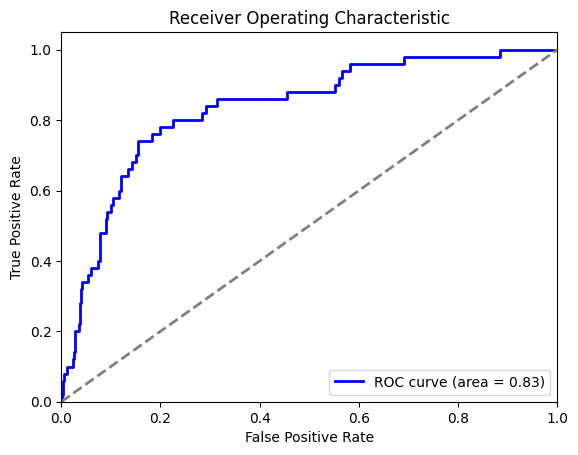

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined
log = LogisticRegression(class_weight='balanced', random_state=random_seed)
log.fit(X_train_scaled, y_train)

y_predict = log.predict(X_test_scaled)
y_predict_proba = log.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Print classification report
print(classification_report(y_test, y_predict, zero_division=0))

# Calculate and print AUC score
auc_score = roc_auc_score(y_test, y_predict_proba)
print(f"AUC Score: {auc_score:.2f}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_predict_proba)
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


              precision    recall  f1-score   support

           0       0.99      0.75      0.85       972
           1       0.14      0.80      0.24        50

    accuracy                           0.75      1022
   macro avg       0.56      0.78      0.55      1022
weighted avg       0.95      0.75      0.82      1022

AUC-PR Score: 0.21


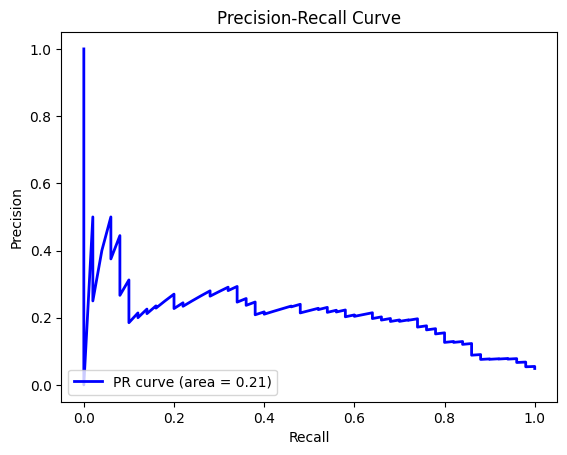

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming X_train_scaled, X_test_scaled, y_train, and y_test are already defined
log = LogisticRegression(class_weight='balanced', random_state=random_seed)
log.fit(X_train_scaled, y_train)

y_predict = log.predict(X_test_scaled)
y_predict_proba = log.predict_proba(X_test_scaled)[:, 1]  # Probability estimates for the positive class

# Print classification report
print(classification_report(y_test, y_predict, zero_division=0))

# Calculate and print AUC-PR score
precision, recall, _ = precision_recall_curve(y_test, y_predict_proba)
auc_pr_score = auc(recall, precision)
print(f"AUC-PR Score: {auc_pr_score:.2f}")

# Plot Precision-Recall Curve
plt.figure()
plt.plot(recall, precision, color='blue', lw=2, label='PR curve (area = %0.2f)' % auc_pr_score)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()
